# Compare Result

this notebook created for comparing result between predicted result from ML model and truth set 

In [1]:
!pip install venn

In [2]:
from venn import venn
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from functools import reduce

In [3]:
columns = ["ID_Query","ID_Target","sequence_identity","alignment_length","number_of_mismatches","number_of_gap_openings", "start-position_in_query", "end-position_in_query", "start-position_in_target","end-position_in_target","E-value","bit_score"]

In [4]:
def create_report1(df,method,column,prediced_set,truth_set,total_AMPs):
    df.loc[method, column]= 0
    accuracy = (predict/total_AMPs )*100     
    set(prediced_set["ID"])
    set(truth_set['ID_Query'])
    return df

def plot_ven_AMP_NonAMP(sample_test,sample_groundtruth,prediced_set,truth_set):
    Samples = {
        sample_test:  set(prediced_set["ID"]),
        sample_groundtruth: set(truth_set['ID_Query']),
        }
    venn(Samples)
    #venn(Samples, fmt="{percentage:.2f}%")    
    
def accuracy_cal( predict , total_AMPs, cond):
    accuracy = (predict/total_AMPs )*100
    print(cond+" Accuracy Percentage = %.2f" % accuracy)
    return accuracy

In [19]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "DNN" : "DNN"
}


_df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

## DECockroach

In [149]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result/DECockroach.len15.MLResult.plk")
DECockroach_ML

,ID,class
0,0,0
1,1,0
2,3,0
3,4,1
4,5,0
...,...,...
199,894298,0
200,894299,0
201,894303,0
202,894304,0


In [150]:
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
DECockroach_len15_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,143923,dbAMP_12224,0.550,20,9,0,1,20,44,63,4.967000e-04,31
1,143923,L03A000107|,0.550,20,9,0,1,20,66,85,4.967000e-04,31
2,775878,420_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,7,23,2.010000e-08,43
3,775878,1676_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,32,48,2.010000e-08,43
4,775878,1653_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,32,48,2.010000e-08,43
...,...,...,...,...,...,...,...,...,...,...,...,...
4076,178554,EN95455285|A|P81709|Lysozyme,0.588,17,7,0,1,17,102,118,5.571000e-04,30
4077,178554,EN60134206|A|P37712|Lysozyme,0.666,15,5,0,1,15,102,116,5.571000e-04,30
4078,178554,EN84379296|A|Q659U1|Lysozyme,0.588,17,7,0,1,17,120,136,5.571000e-04,30
4079,178554,EN34191792|A|Q659U0|Lysozyme,0.588,17,7,0,1,17,120,136,5.571000e-04,30


<AxesSubplot:>

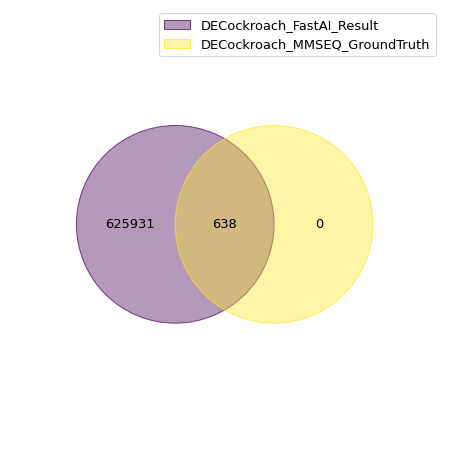

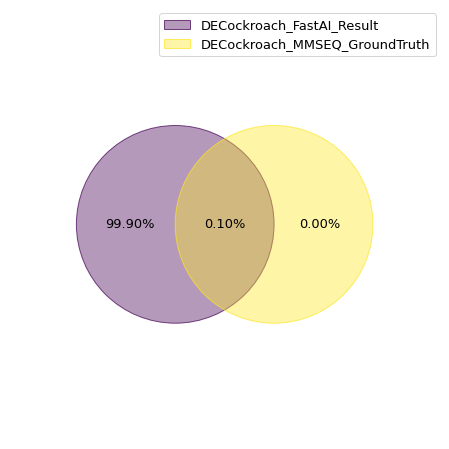

In [151]:
DECockroachSamples = {
    "DECockroach_FastAI_Result":  set(DECockroach_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

<AxesSubplot:>

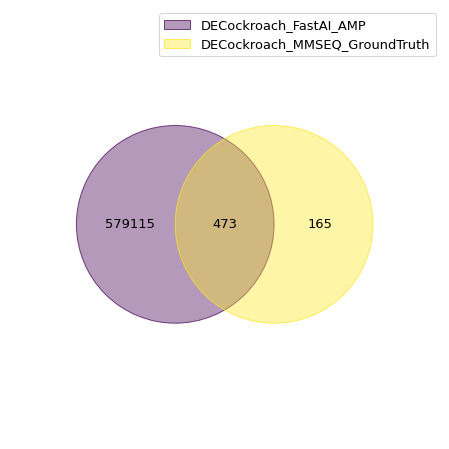

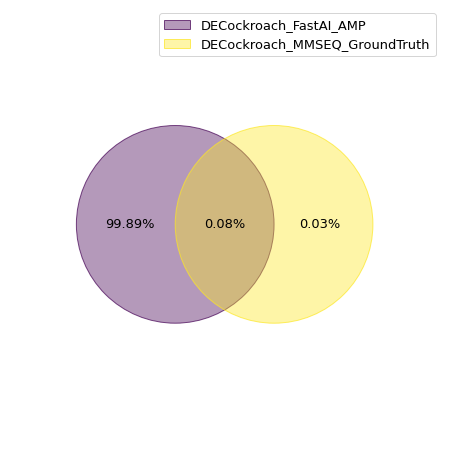

In [152]:
DECockroachSamples = {
    "DECockroach_FastAI_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [156]:
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
print(DECockroach_total_AMPS_with100)

77


<AxesSubplot:>

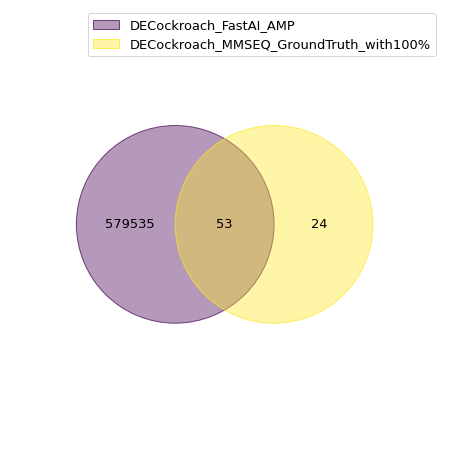

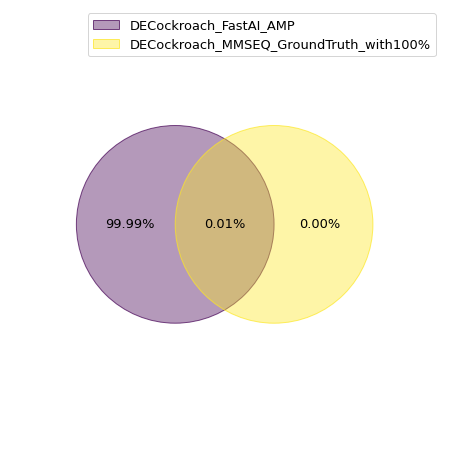

In [154]:
DECockroachSamples = {
    "DECockroach_FastAI_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth_with100%": set(filtered_DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [129]:
accuracy = (473/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (53/DECockroach_total_AMPS_with100 )*100
print("%.2f" % accuracy)

74.14
68.83


# ---------------------------------------

From A)  first we use prediction result ( which contains both NonAMP  and AMP  )  ( Purple bubble here )  intersect with a ground truth set.

Next , In B) we exclude the non AMPs out from prediction results , we see a high number in ( purple bubble). This means  Most of the sequence predict to be AMP rather than to be a non AMP (you  can see the  number  in purple part between A and B) which is not likely to be  true . So in this case show a Very high false positive rate on the prediction (i.e., predict Non AMP to be AMP , high amount in purple color in Venn diagram),  
(If we calculate non amp  625K-579K = 46K.)

Next if we look into yellow bubble , there is a remaining  number  in yellow which we consider it as a false negative  because the model predict these  as the Non AMPs.

## Version 2 , FastAI

In [14]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_FastAI/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

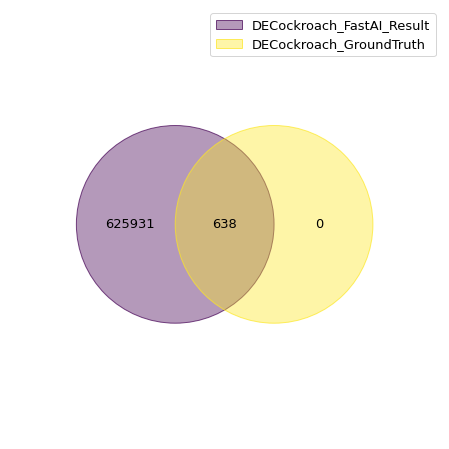

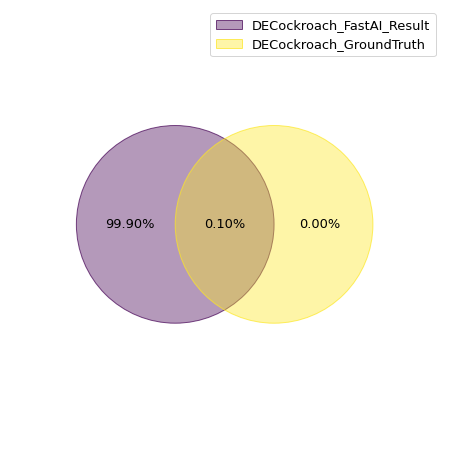

In [15]:
# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

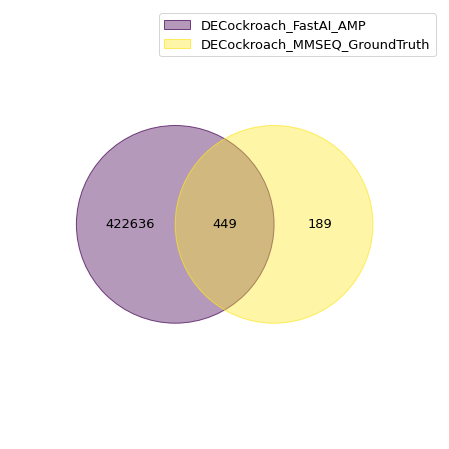

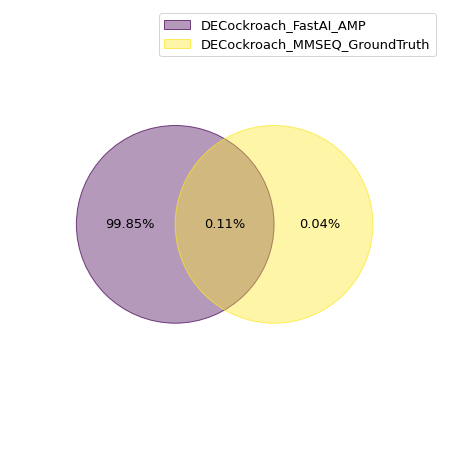

In [16]:
# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )


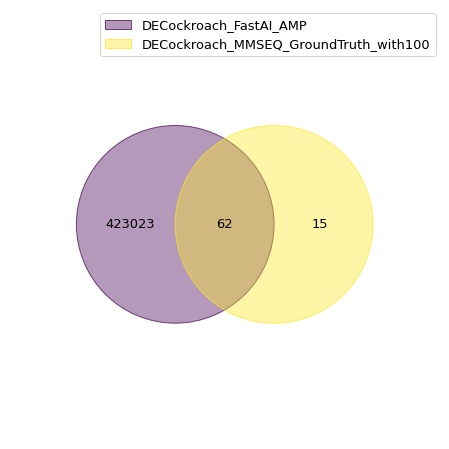

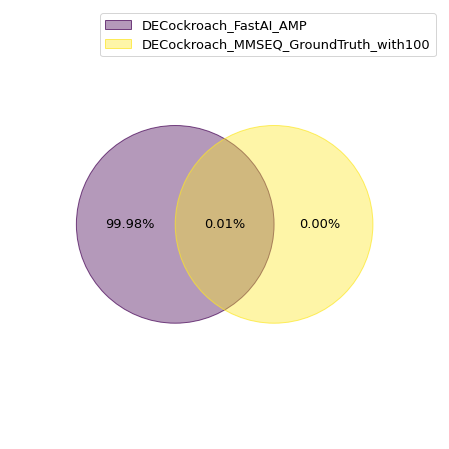

In [17]:
# AMP only compares with filtering 100% seq identity on ground truth
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

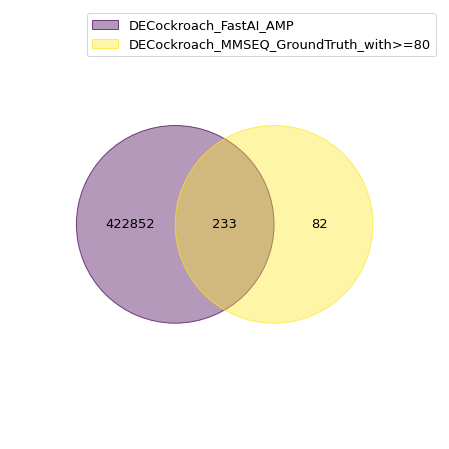

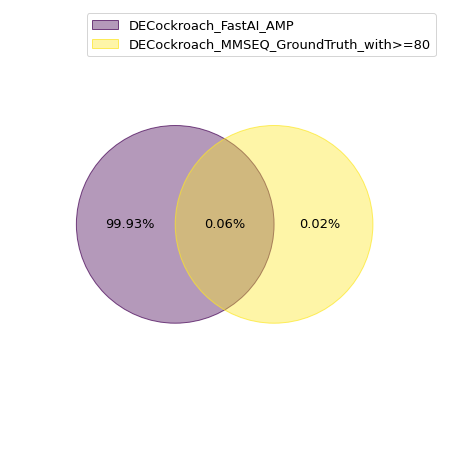

In [8]:
# 80-100%
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >= 0.8]
DECockroach_total_AMPS_with80 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth_with>=80", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [18]:
# total 
accuracy_cal(449, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(62, DECockroach_total_AMPS_with100 )
# 80-100% similarity 
accuracy_cal(233, DECockroach_total_AMPS_with80 )

 Accuracy Percentage = 70.38
 Accuracy Percentage = 80.52


NameError: name 'DECockroach_total_AMPS_with80' is not defined

## with length <= 200

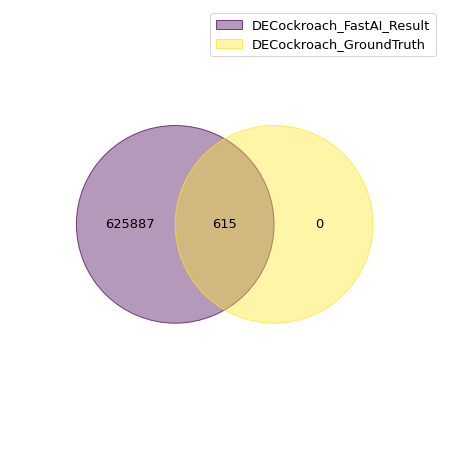

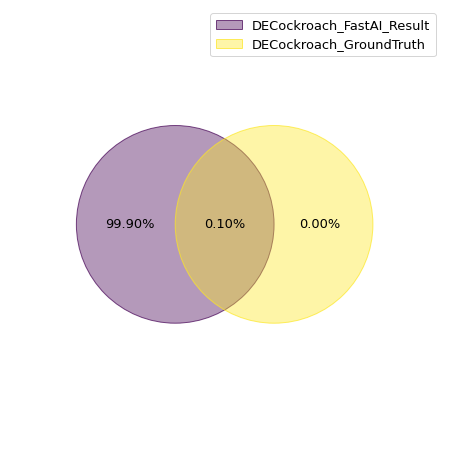

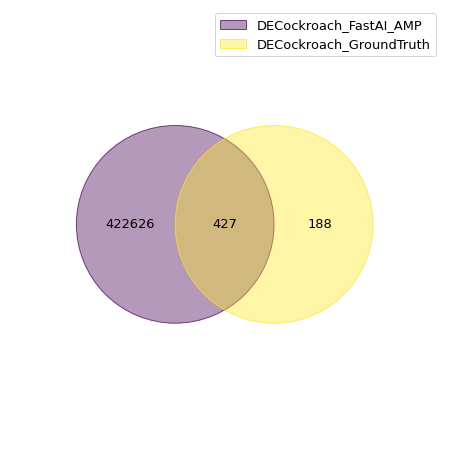

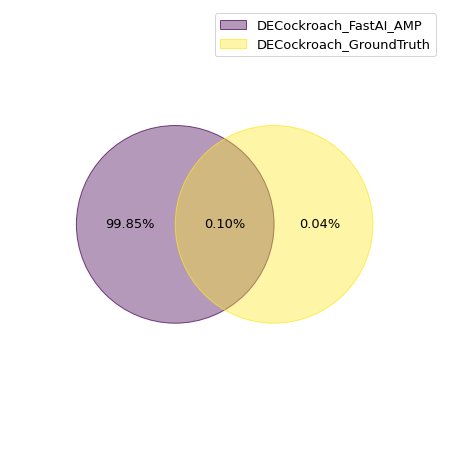

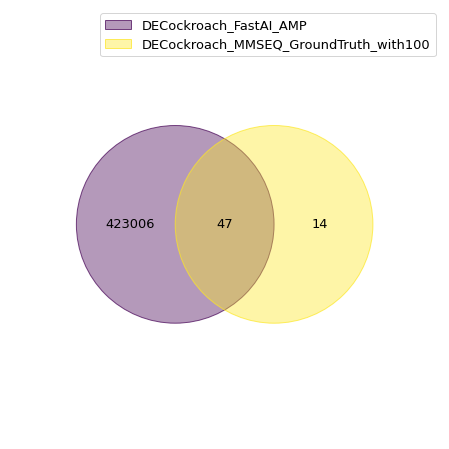

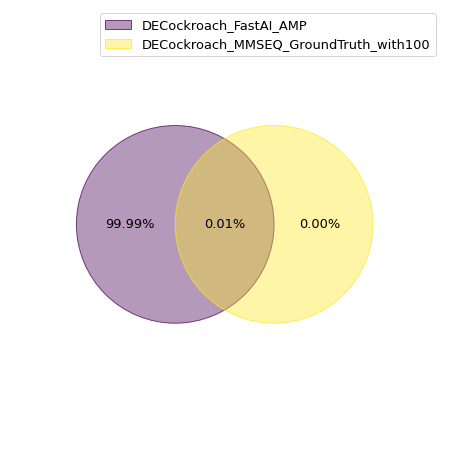

In [28]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_FastAI/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]


DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [29]:
# total 
accuracy_cal(427, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(47, DECockroach_total_AMPS_with100 )
print("Total result " + str(len(DECockroach_ML)) )
print("Total AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP with_100: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 69.43
 Accuracy Percentage = 77.05
Total result 626502
Total AMP 423053
Total NonAMP 203449
Total AMP with_100: 61


## with length <= 30

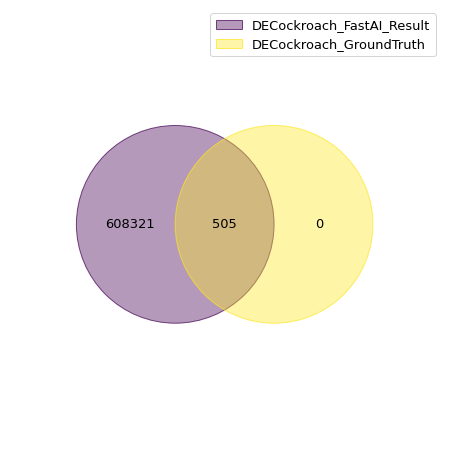

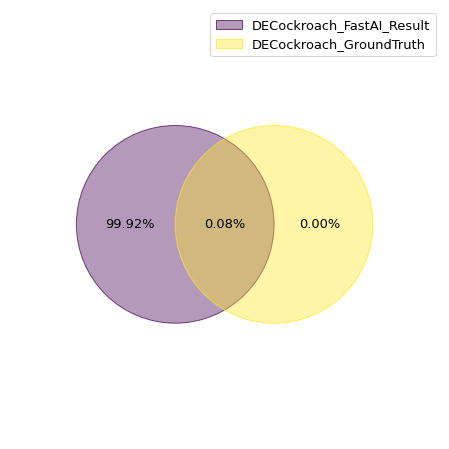

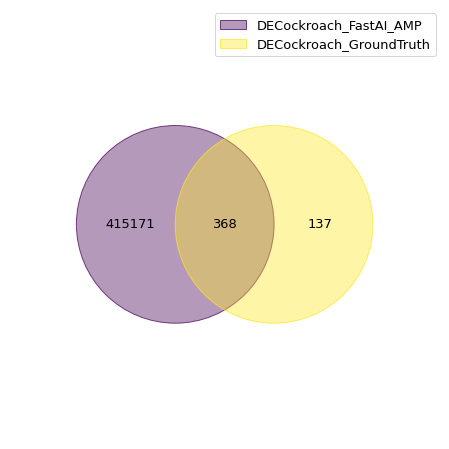

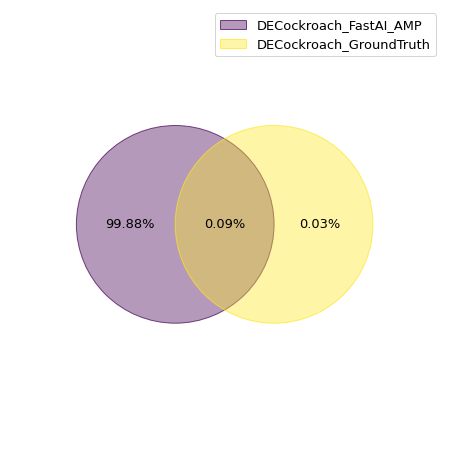

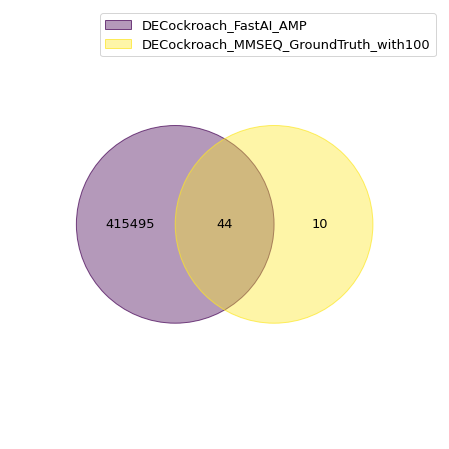

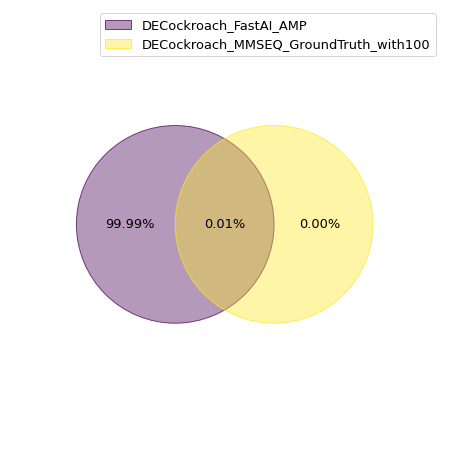

In [30]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_FastAI/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [31]:
# total 
accuracy_cal(368, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(44, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP with_100: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 72.87
 Accuracy Percentage = 81.48
Total result 608826
Total AMP 415539
Total NonAMP 193287
Total AMP with_100: 54


## Version 2 , CNN RMSpop


In [32]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN_RMSpop/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

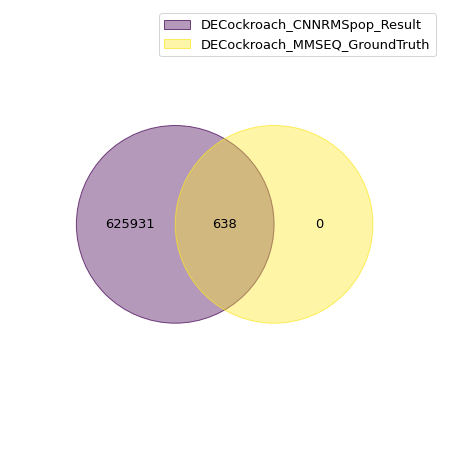

In [36]:
# AMP and Non AMP compare with ground truth
DECockroachSamples = {
    "DECockroach_CNNRMSpop_Result":  set(DECockroach_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
#venn(DECockroachSamples, fmt="{percentage:.2f}%")

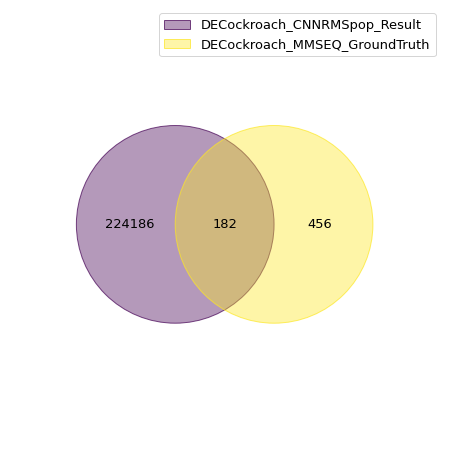

In [41]:
# AMP only compares with ground truth
DECockroachSamples = {
    "DECockroach_CNNRMSpop_Result":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
#venn(DECockroachSamples, fmt="{percentage:.2f}%")

For sequence identiy s equal to 100%

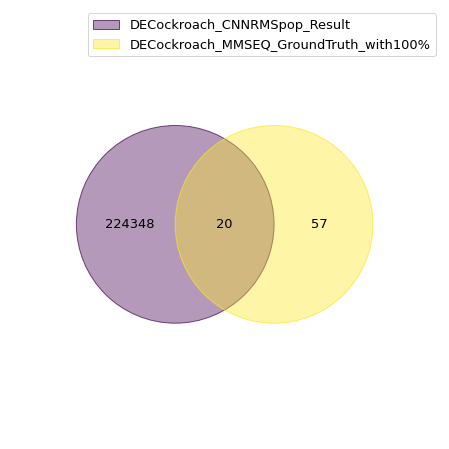

In [42]:
# AMP only compares with filtering 100% seq identity on ground truth
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
DECockroachSamples = {
    "DECockroach_CNNRMSpop_Result":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth_with100%": set(filtered_DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
#venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [40]:
accuracy = (182/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (20/DECockroach_total_AMPS_with100 )*100
print("%.2f" % accuracy)
      
print("Total result " + str(len(DECockroach_ML)) )
print("Total AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP with_100: " + str( DECockroach_total_AMPS_with100) )

28.53
25.97
Total result 626569
Total AMP 224368
Total NonAMP 402201
Total AMP with_100: 77


## with <= 200

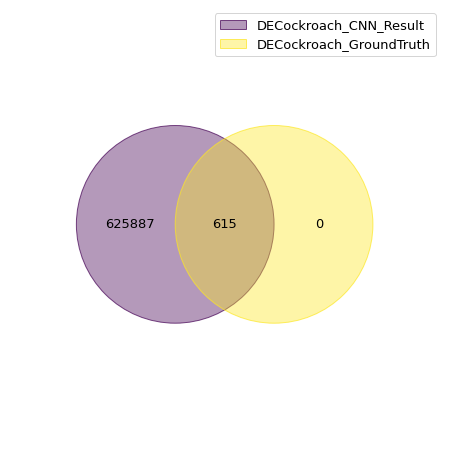

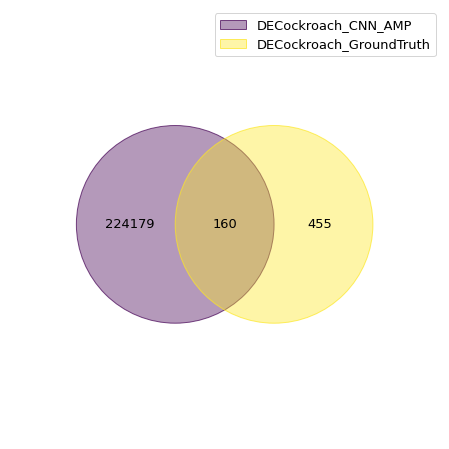

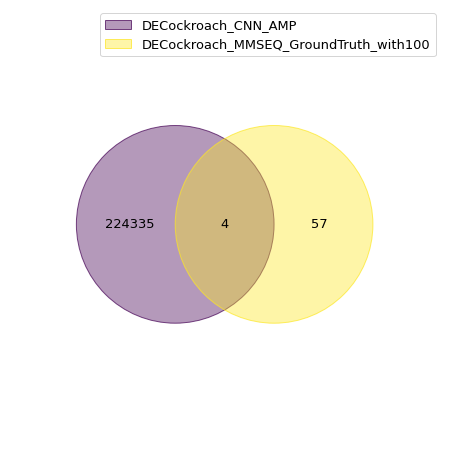

In [43]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN_RMSpop/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [44]:
accuracy = (160/DECockroach_total_AMPS )*100
print("accuracy %.2f" % accuracy)
accuracy = (4/DECockroach_total_AMPS_with100 )*100
print("accuracy %.2f" % accuracy)

print("Total result " + str(len(DECockroach_ML)) )
print("Total AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP with_100: " + str( DECockroach_total_AMPS_with100) )

accuracy 26.02
accuracy 6.56
Total result 626502
Total AMP 224339
Total NonAMP 402163
Total AMP with_100: 61


## with <=30 

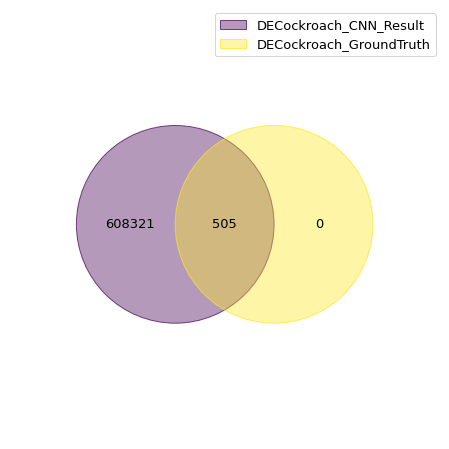

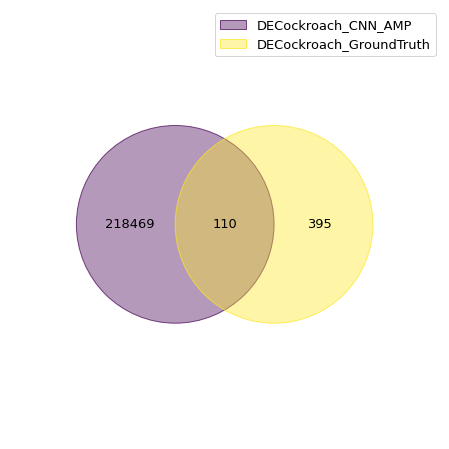

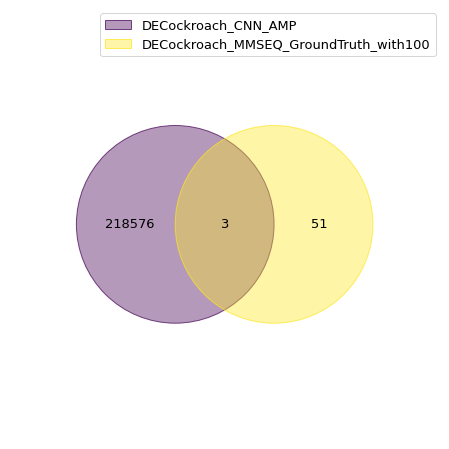

In [46]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN_RMSpop/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [47]:
# total 
accuracy_cal(110, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(3, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP with_100: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 21.78
 Accuracy Percentage = 5.56
Total result 608826
Total AMP 218579
Total NonAMP 390247
Total AMP with_100: 54


# Ensemble

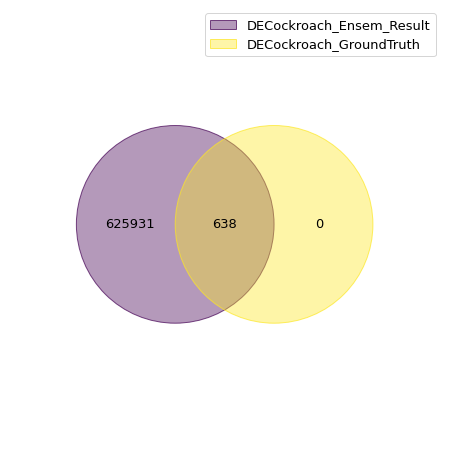

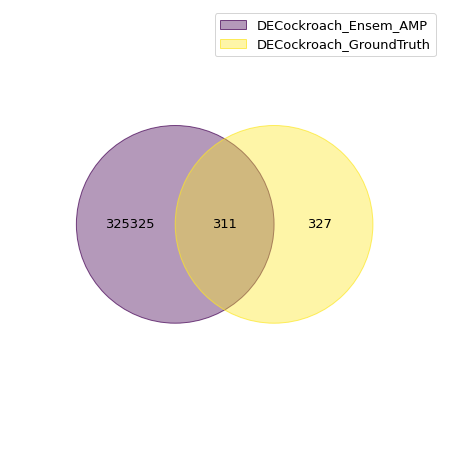

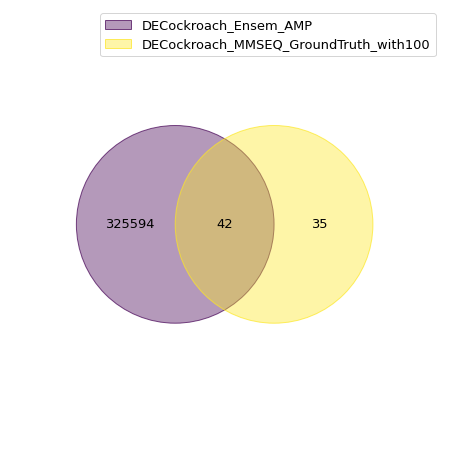

In [60]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_Ensemble/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_Ensem_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_Ensem_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_Ensem_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [61]:
# total 
accuracy_cal(311, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(42, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP with_100: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 48.75
 Accuracy Percentage = 54.55
Total result 626569
Total AMP 325636
Total NonAMP 300933
Total AMP with_100: 77


## with <= 200

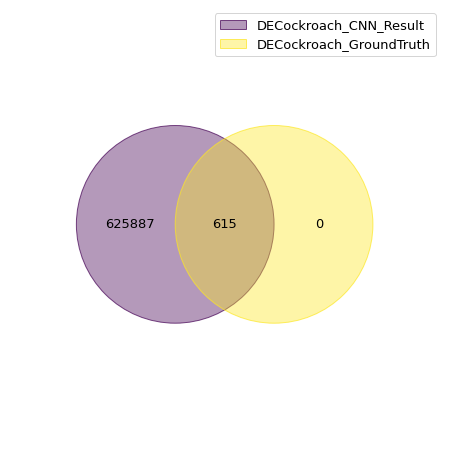

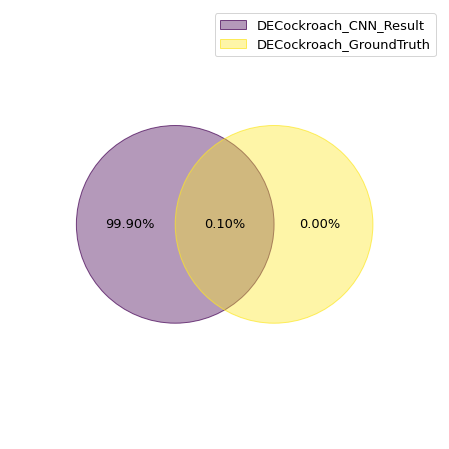

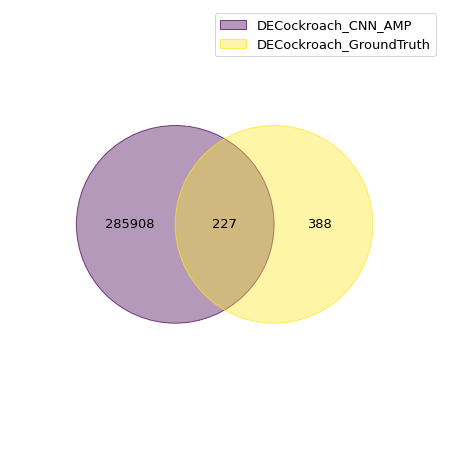

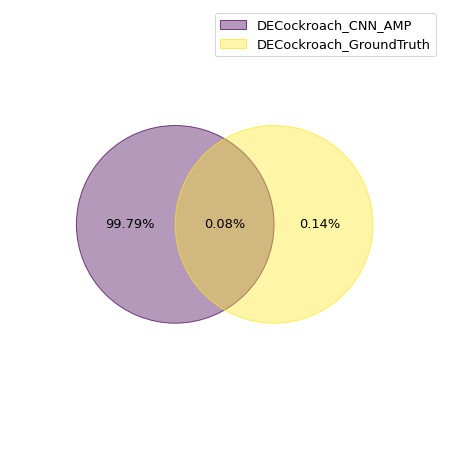

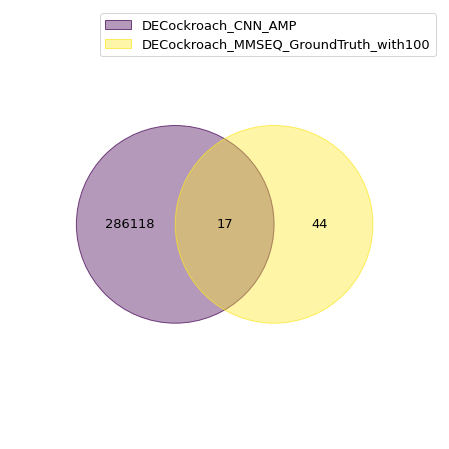

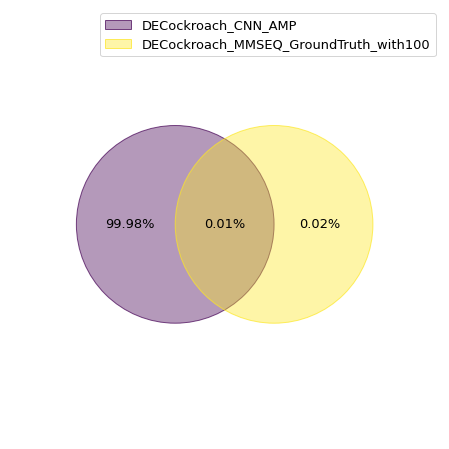

In [6]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_Ensemble/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [7]:
# total 
accuracy_cal(227, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(17, DECockroach_total_AMPS_with100 )

 Accuracy Percentage = 36.91
 Accuracy Percentage = 27.87


## with <= 30

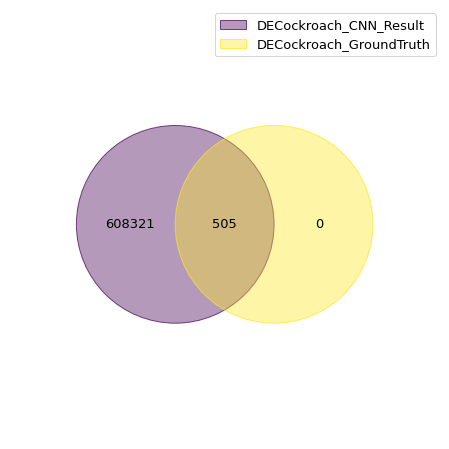

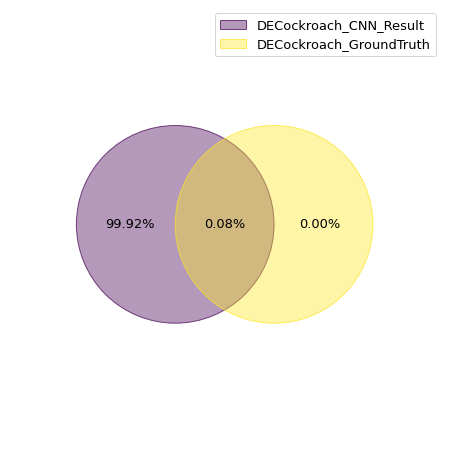

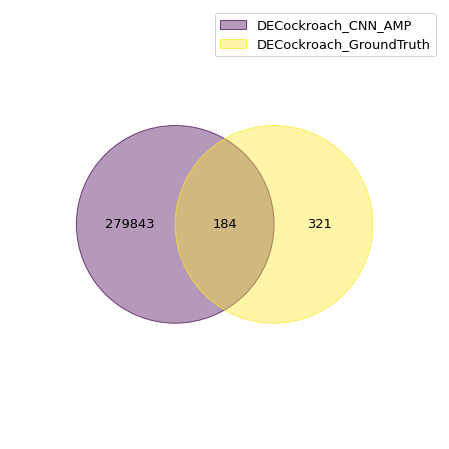

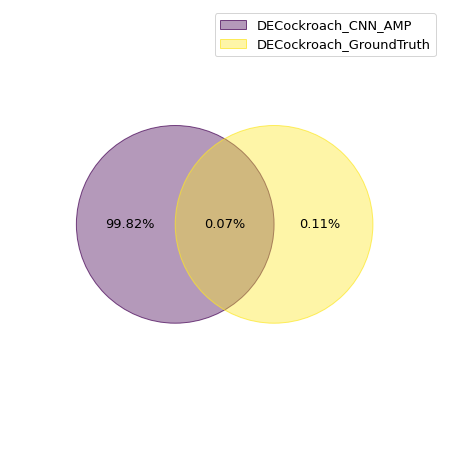

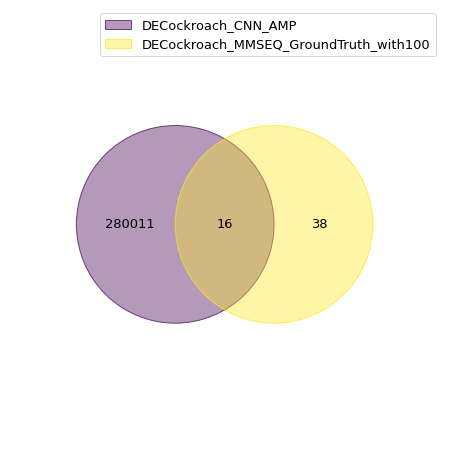

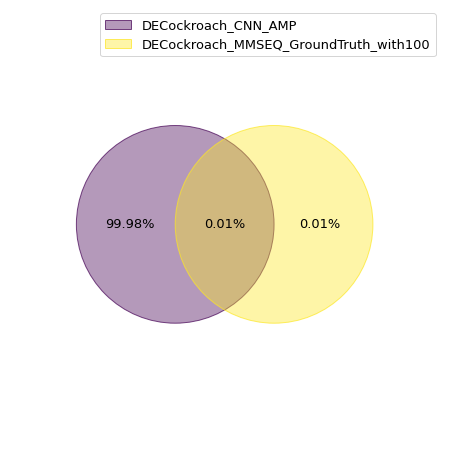

In [4]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_Ensemble/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [5]:
accuracy = (184/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (16/DECockroach_total_AMPS_with100 )*100
print("%.2f" % accuracy)

36.44
29.63


# SVM

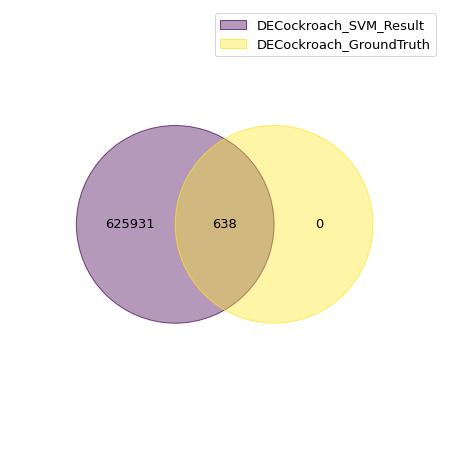

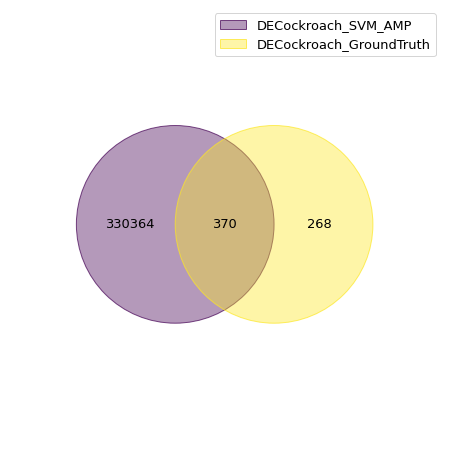

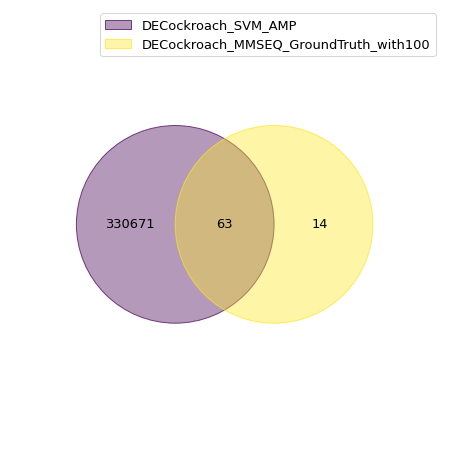

In [50]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_SVM/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_SVM_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_SVM_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_SVM_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [52]:
# total 
accuracy_cal(370, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(63, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 57.99
 Accuracy Percentage = 81.82
Total result 626569
Total predicted AMP 330734
Total predicted NonAMP 295835
Total AMP  from MMSEQ: 638
Total AMP with_100 from MMSEQ: 77


## with <= 200

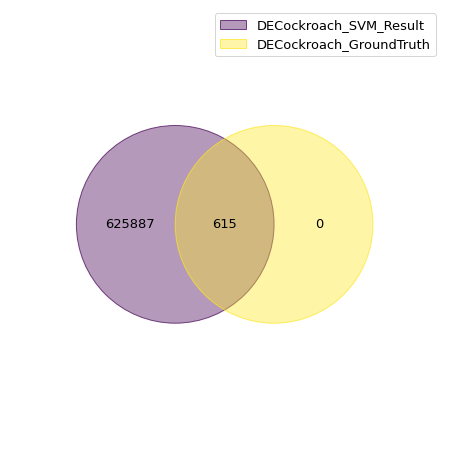

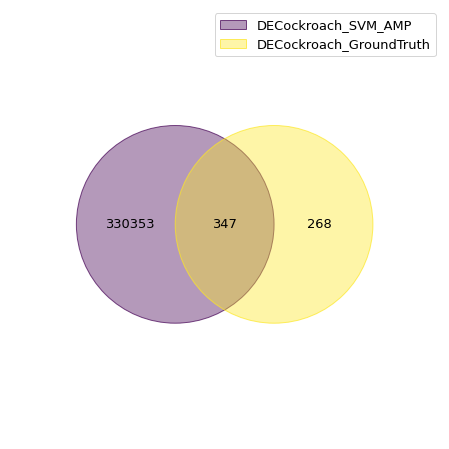

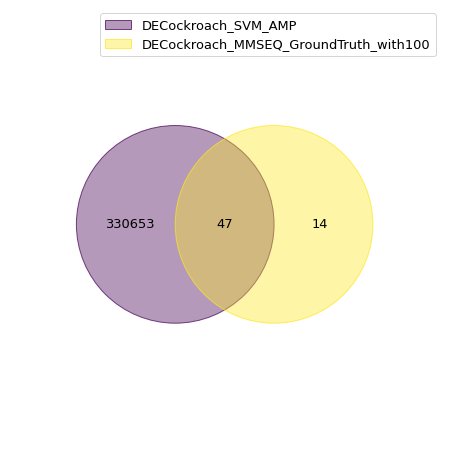

In [57]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_SVM/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_SVM_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_SVM_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_SVM_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [59]:
# total 
accuracy_cal(347, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(47, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 56.42
 Accuracy Percentage = 77.05
Total result 626502
Total predicted AMP 330700
Total predicted NonAMP 295802
Total AMP  from MMSEQ: 615
Total AMP with_100 from MMSEQ: 61


## with <= 30

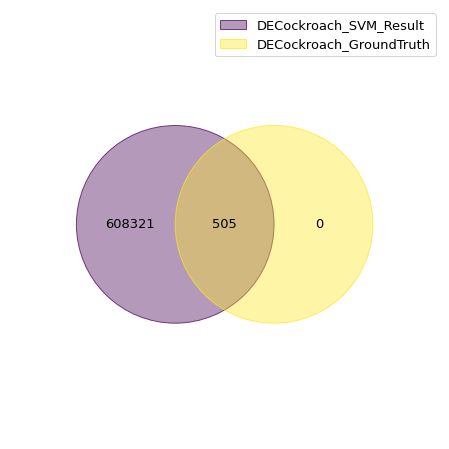

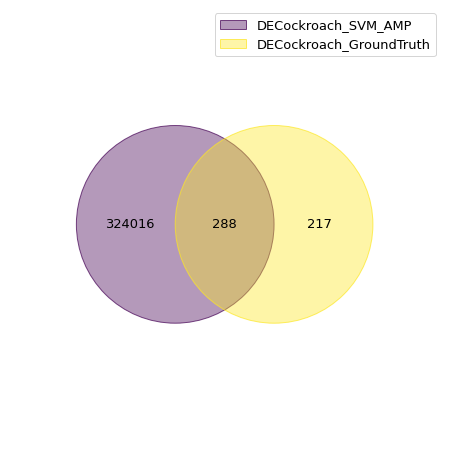

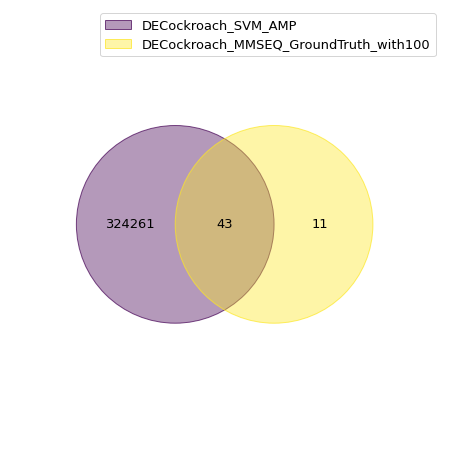

In [53]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_SVM/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_SVM_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_SVM_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_SVM_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [54]:
# total 
accuracy_cal(288, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(43, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 57.03
 Accuracy Percentage = 79.63
Total result 608826
Total predicted AMP 324304
Total predicted NonAMP 284522
Total AMP  from MMSEQ: 505
Total AMP with_100 from MMSEQ: 54


# CNN Adam

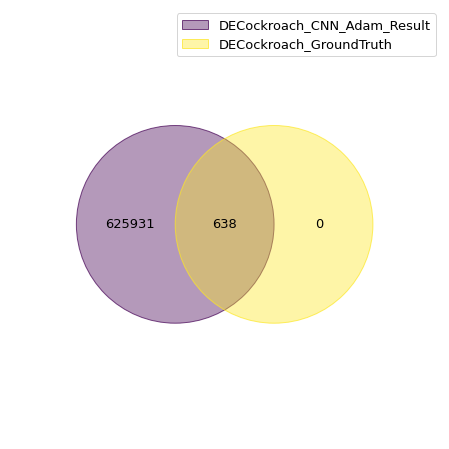

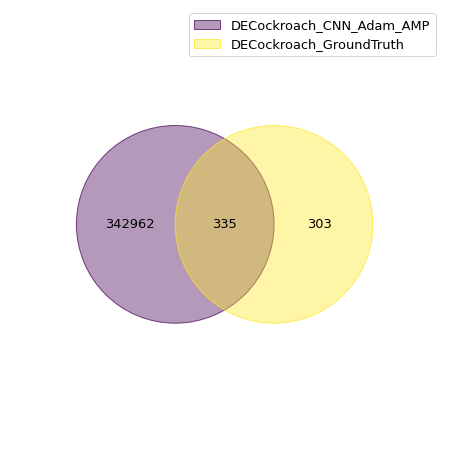

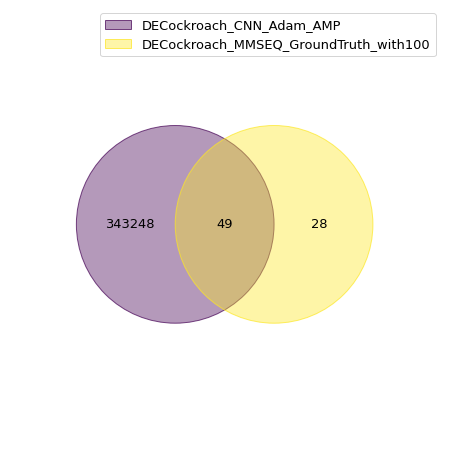

In [68]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN_Adam/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_Adam_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_Adam_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNN_Adam_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [67]:
# total 
accuracy_cal(335, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(49, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 52.51
 Accuracy Percentage = 63.64
Total result 626569
Total predicted AMP 343297
Total predicted NonAMP 283272
Total AMP  from MMSEQ: 638
Total AMP with_100 from MMSEQ: 77


## with 200

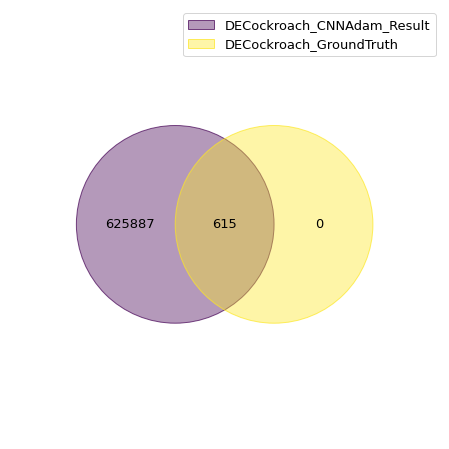

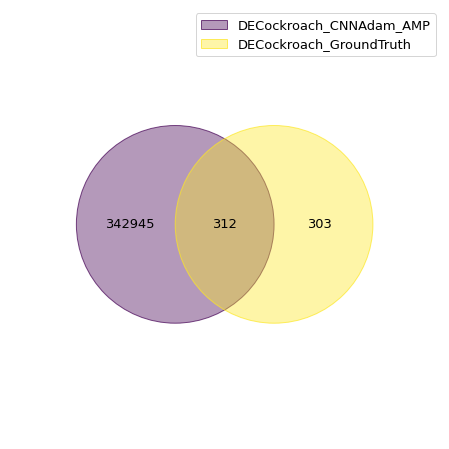

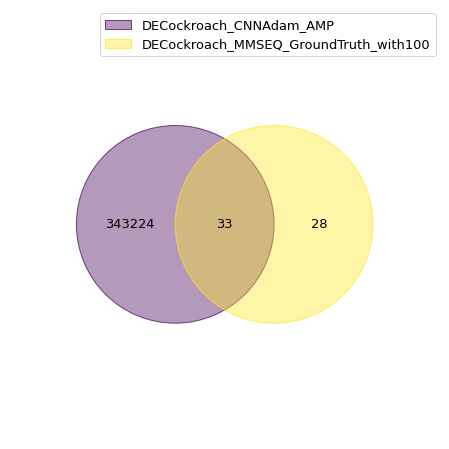

In [63]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN_Adam/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNNAdam_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNNAdam_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNNAdam_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [64]:
# total 
accuracy_cal(312, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(33, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 50.73
 Accuracy Percentage = 54.10
Total result 626502
Total predicted AMP 343257
Total predicted NonAMP 283245
Total AMP  from MMSEQ: 615
Total AMP with_100 from MMSEQ: 61


## with <= 30

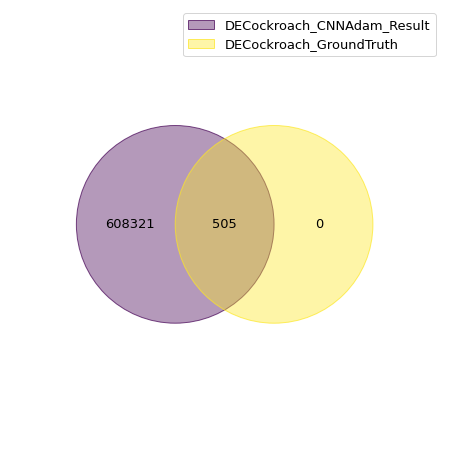

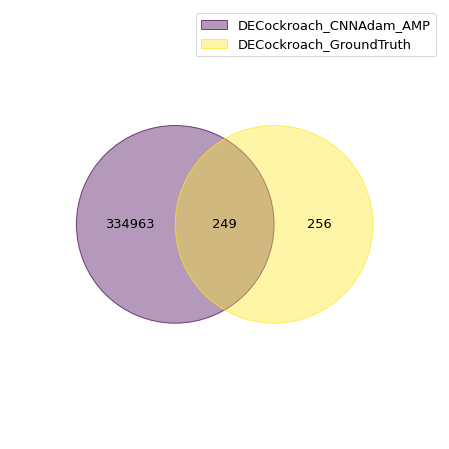

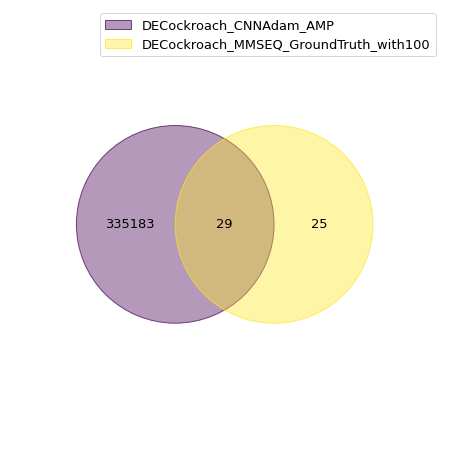

In [69]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN_Adam/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNNAdam_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNNAdam_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNNAdam_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth) 

In [70]:
# total 
accuracy_cal(312, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(33, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 61.78
 Accuracy Percentage = 61.11
Total result 608826
Total predicted AMP 335212
Total predicted NonAMP 273614
Total AMP  from MMSEQ: 505
Total AMP with_100 from MMSEQ: 54


# RF

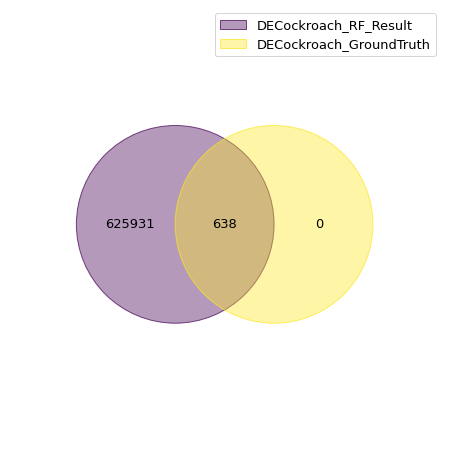

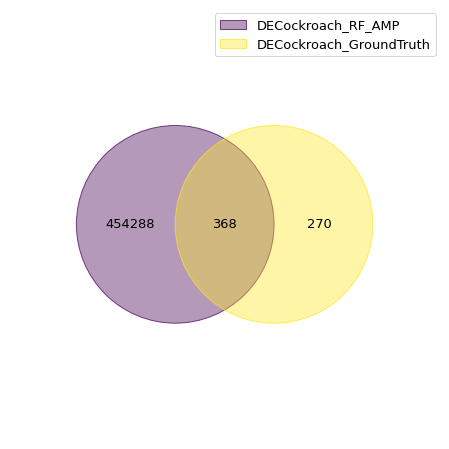

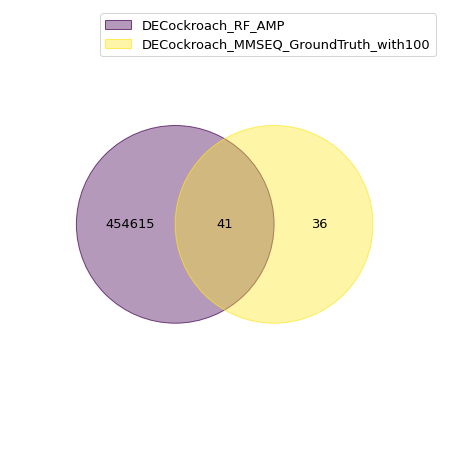

In [74]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_RF/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_RF_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_RF_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_RF_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [75]:
# total 
accuracy_cal(368, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(41, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 57.68
 Accuracy Percentage = 53.25
Total result 626569
Total predicted AMP 454656
Total predicted NonAMP 171913
Total AMP  from MMSEQ: 638
Total AMP with_100 from MMSEQ: 77


## <= 200

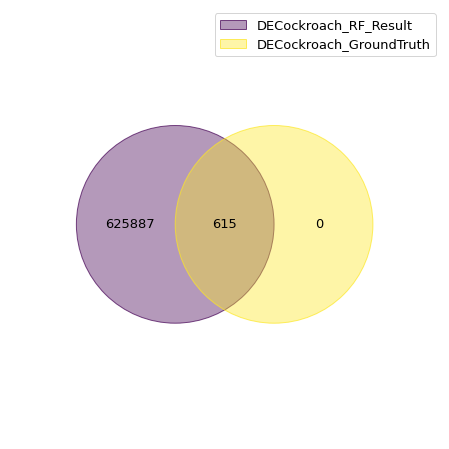

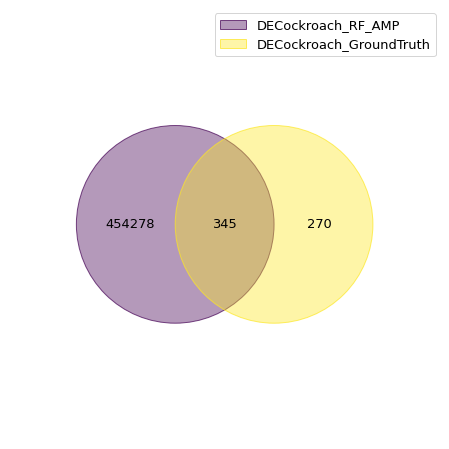

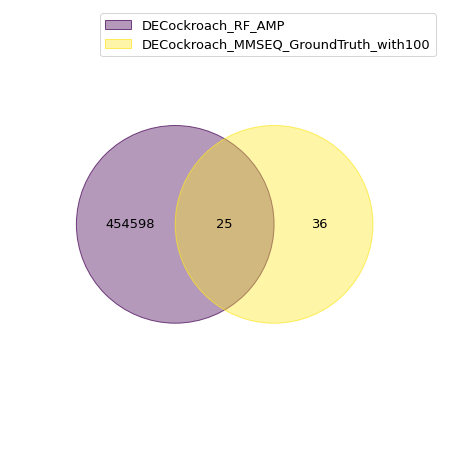

In [80]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_RF/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_RF_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_RF_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_RF_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [77]:
# total 
accuracy_cal(345, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(25, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 56.10
 Accuracy Percentage = 40.98
Total result 626502
Total predicted AMP 454623
Total predicted NonAMP 171879
Total AMP  from MMSEQ: 615
Total AMP with_100 from MMSEQ: 61


## <= 30

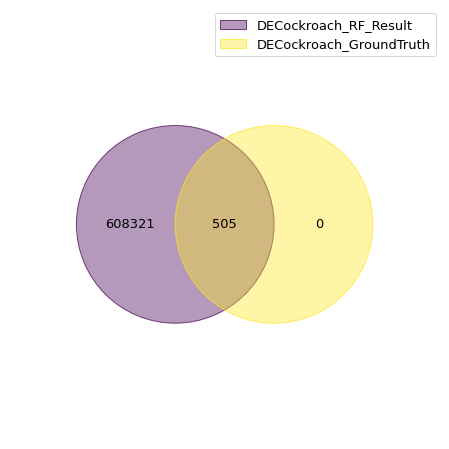

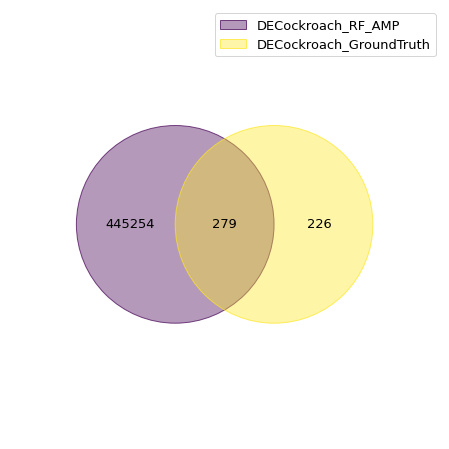

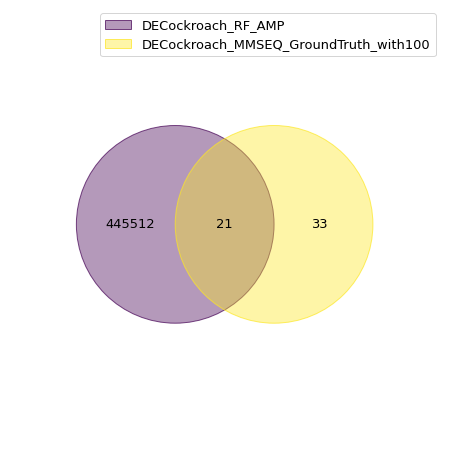

In [81]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_RF/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_RF_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_RF_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_RF_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth) 

In [82]:
# total 
accuracy_cal(279, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(21, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 55.25
 Accuracy Percentage = 38.89
Total result 608826
Total predicted AMP 445533
Total predicted NonAMP 163293
Total AMP  from MMSEQ: 505
Total AMP with_100 from MMSEQ: 54


In [ ]:
# XGBoost

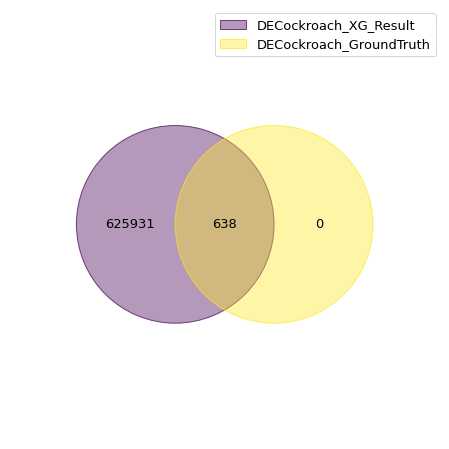

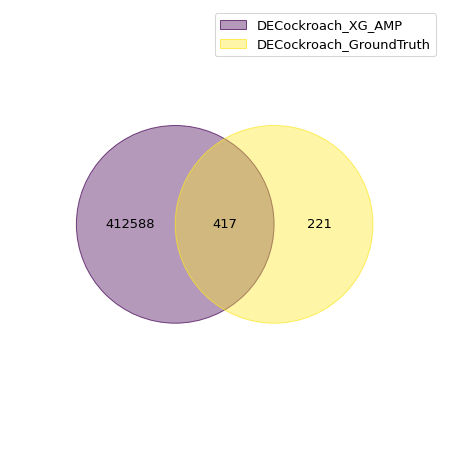

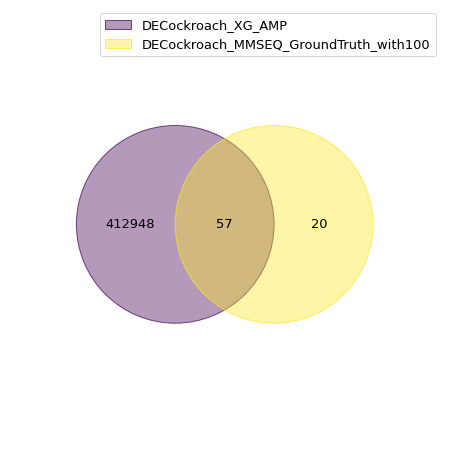

In [90]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_XG/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_XG_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_XG_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_XG_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [89]:
# total 
accuracy_cal(417, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(57, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 67.80
 Accuracy Percentage = 93.44
Total result 626502
Total predicted AMP 412967
Total predicted NonAMP 213535
Total AMP  from MMSEQ: 615
Total AMP with_100 from MMSEQ: 61


In [ ]:
## <= 200

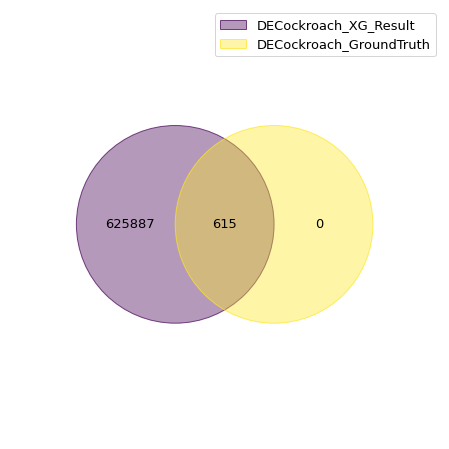

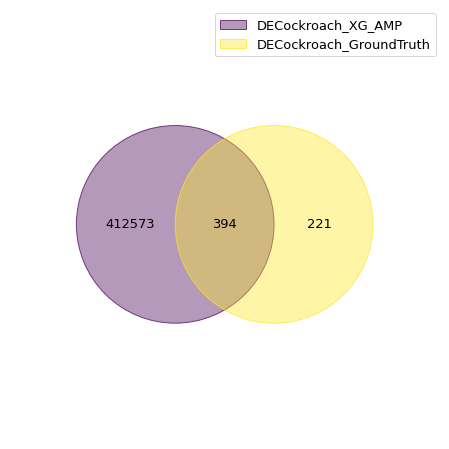

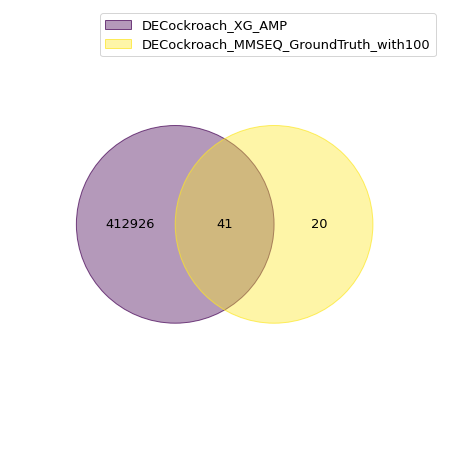

In [87]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_XG/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_XG_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_XG_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_XG_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [88]:
# total 
accuracy_cal(249, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(29, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 40.49
 Accuracy Percentage = 47.54
Total result 626502
Total predicted AMP 412967
Total predicted NonAMP 213535
Total AMP  from MMSEQ: 615
Total AMP with_100 from MMSEQ: 61


## <= 30

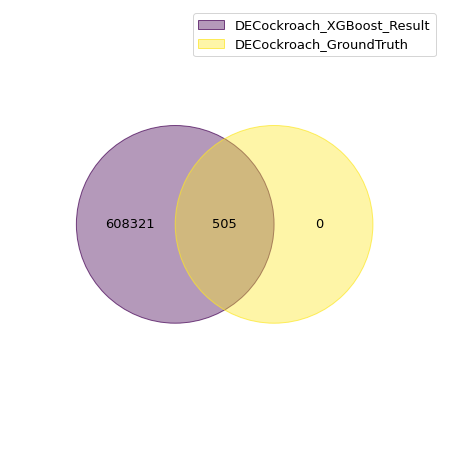

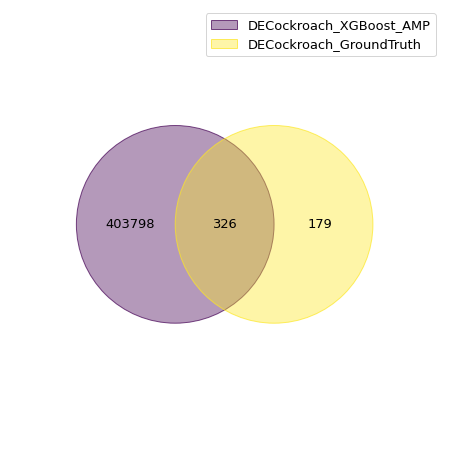

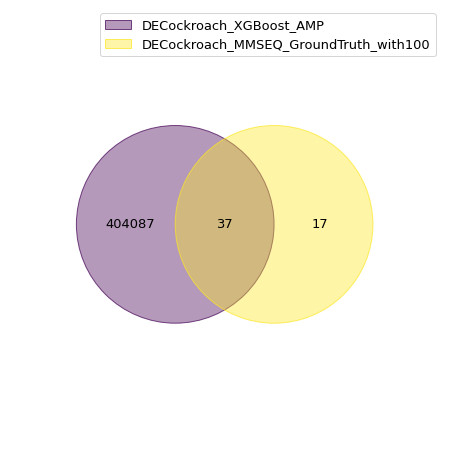

In [86]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_XG/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_XGBoost_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_XGBoost_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_XGBoost_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth) 

In [85]:
# total 
accuracy_cal(326, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(37, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 64.55
 Accuracy Percentage = 68.52
Total result 608826
Total predicted AMP 404124
Total predicted NonAMP 204702
Total AMP  from MMSEQ: 505
Total AMP with_100 from MMSEQ: 54


In [ ]:
# DNN

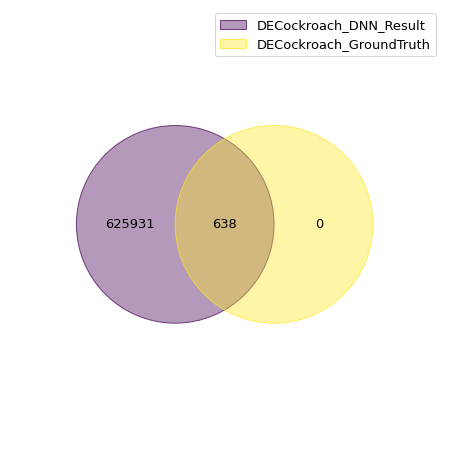

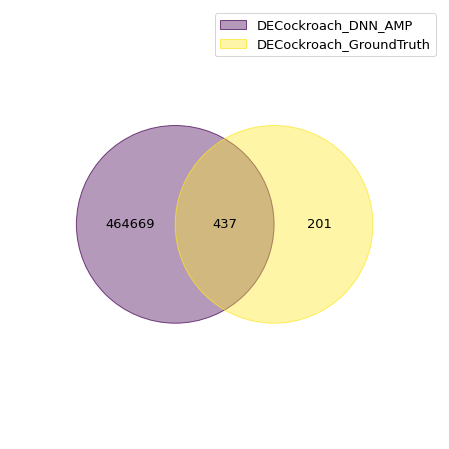

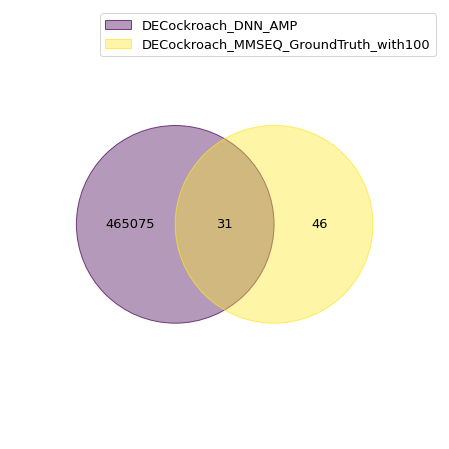

In [91]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_DNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_DNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_DNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_DNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [92]:
# total 
accuracy_cal(437, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(31, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 68.50
 Accuracy Percentage = 40.26
Total result 626569
Total predicted AMP 465106
Total predicted NonAMP 161463
Total AMP  from MMSEQ: 638
Total AMP with_100 from MMSEQ: 77


In [ ]:
## <= 200

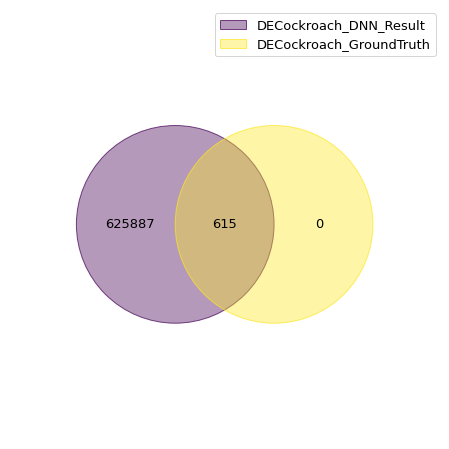

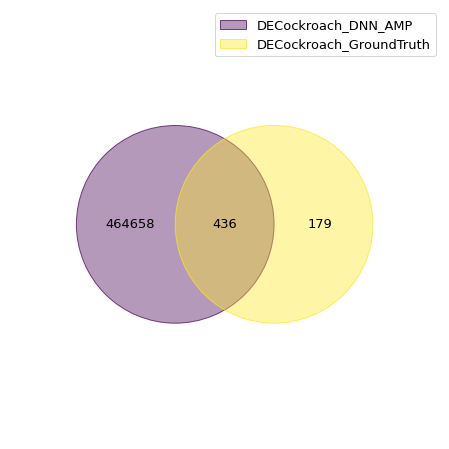

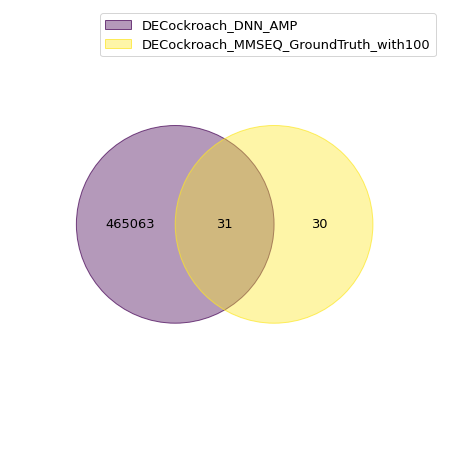

In [93]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_DNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_DNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_DNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_DNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [95]:
# total 
accuracy_cal(436, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(31, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 70.89
 Accuracy Percentage = 50.82
Total result 626502
Total predicted AMP 465094
Total predicted NonAMP 161408
Total AMP  from MMSEQ: 615
Total AMP with_100 from MMSEQ: 61


In [ ]:
## <= 30

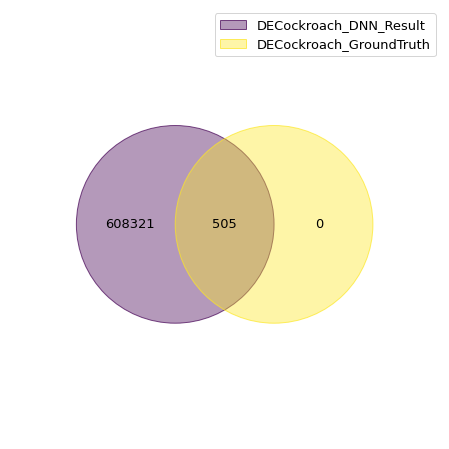

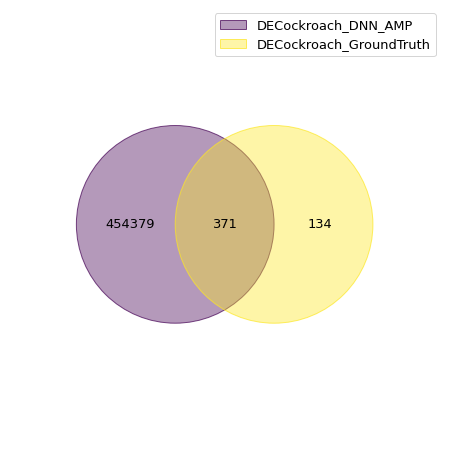

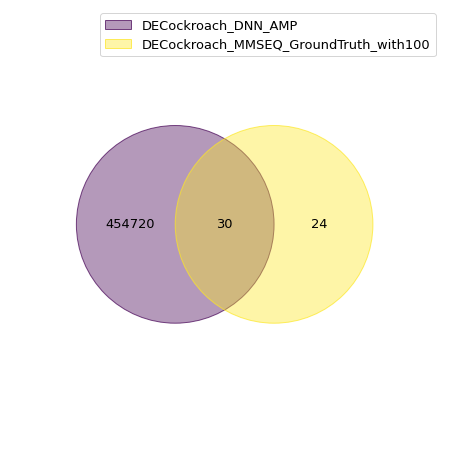

In [96]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_DNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_DNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_DNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_DNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth) 

In [97]:
# total 
accuracy_cal(371, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(30, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 73.47
 Accuracy Percentage = 55.56
Total result 608826
Total predicted AMP 454750
Total predicted NonAMP 154076
Total AMP  from MMSEQ: 505
Total AMP with_100 from MMSEQ: 54


In [ ]:
# ProtCNN

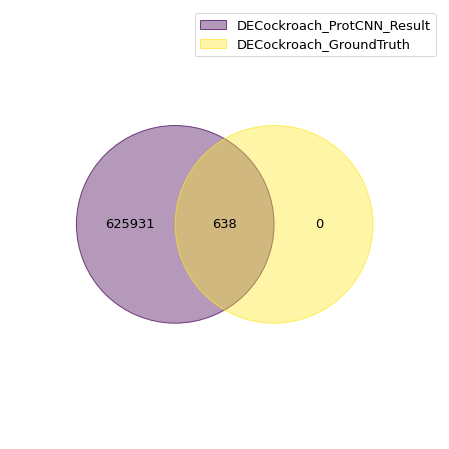

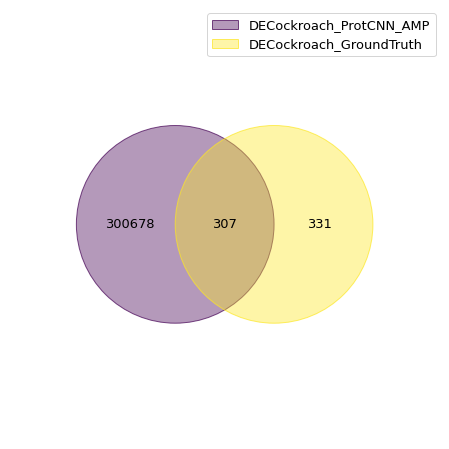

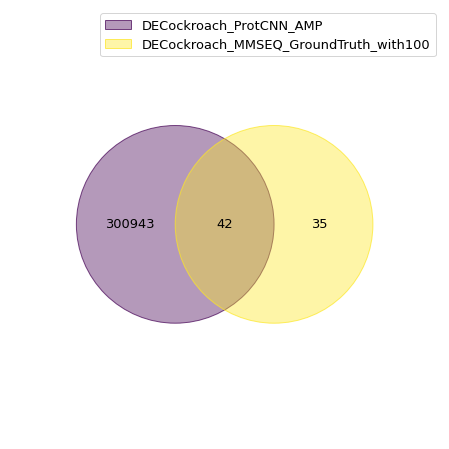

In [98]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_ProtCNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_ProtCNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_ProtCNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_ProtCNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [99]:
# total 
accuracy_cal(307, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(42, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 48.12
 Accuracy Percentage = 54.55
Total result 626569
Total predicted AMP 300985
Total predicted NonAMP 325584
Total AMP  from MMSEQ: 638
Total AMP with_100 from MMSEQ: 77


In [ ]:
## <= 200

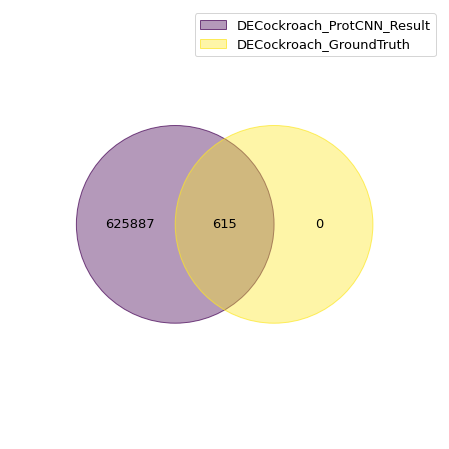

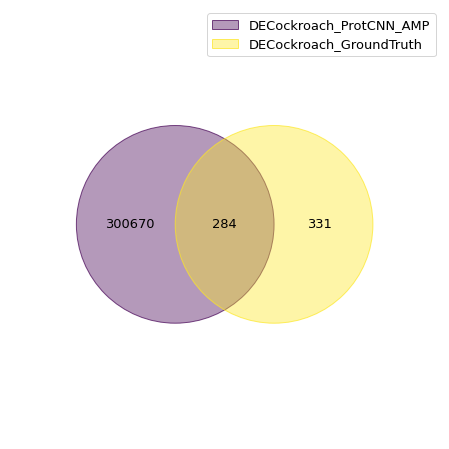

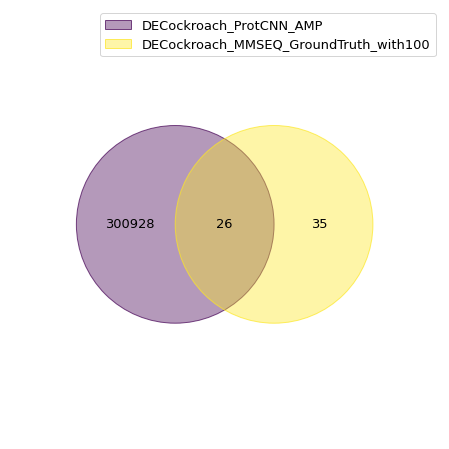

In [102]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_ProtCNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_ProtCNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_ProtCNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_ProtCNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [103]:
# total 
accuracy_cal(284, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(26, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 46.18
 Accuracy Percentage = 42.62
Total result 626502
Total predicted AMP 300954
Total predicted NonAMP 325548
Total AMP  from MMSEQ: 615
Total AMP with_100 from MMSEQ: 61


In [ ]:
## <= 30

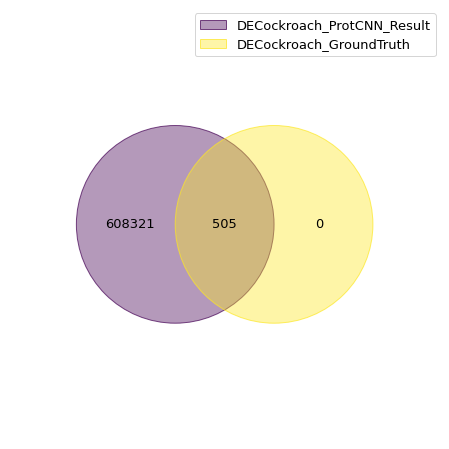

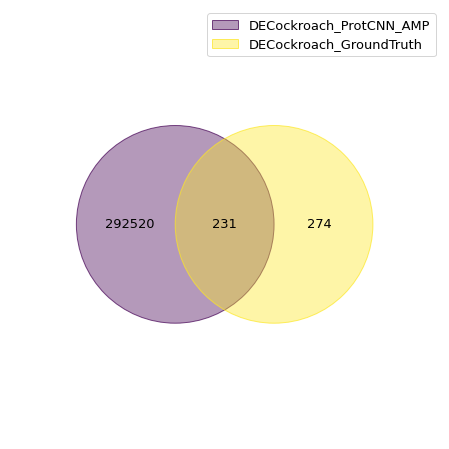

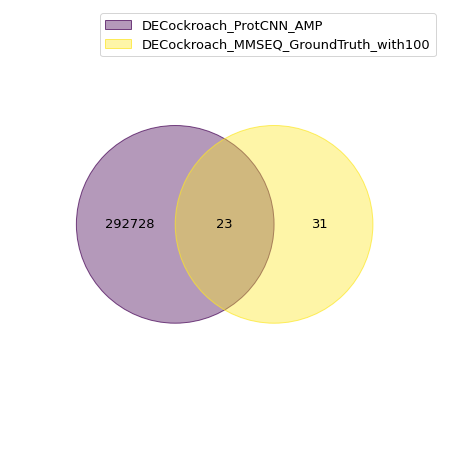

In [104]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_ProtCNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_ProtCNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_ProtCNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_ProtCNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth) 

In [106]:
# total 
accuracy_cal(231, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(23, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 45.74
 Accuracy Percentage = 42.59
Total result 608826
Total predicted AMP 292751
Total predicted NonAMP 316075
Total AMP  from MMSEQ: 505
Total AMP with_100 from MMSEQ: 54


In [ ]:
# AmPep30

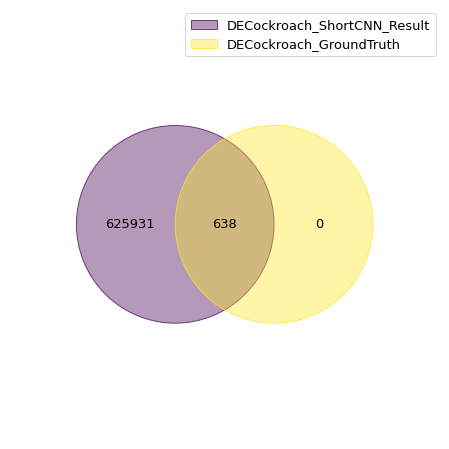

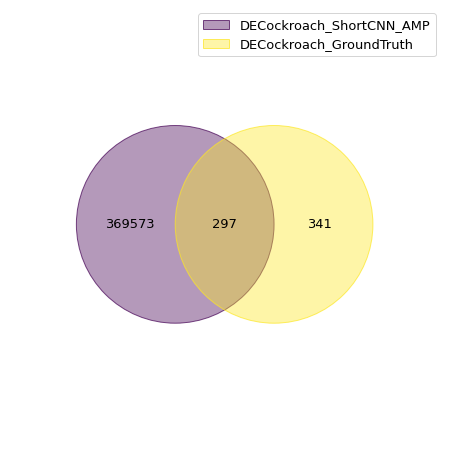

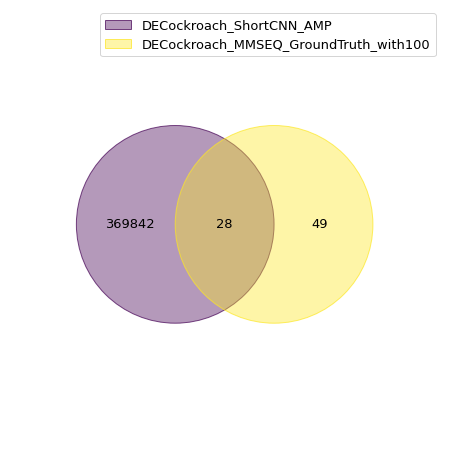

In [111]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_ShortCNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_ShortCNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_ShortCNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_ShortCNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [112]:
# total 
accuracy_cal(297, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(28, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 46.55
 Accuracy Percentage = 36.36
Total result 626569
Total predicted AMP 369870
Total predicted NonAMP 256699
Total AMP  from MMSEQ: 638
Total AMP with_100 from MMSEQ: 77


In [ ]:
## <= 200

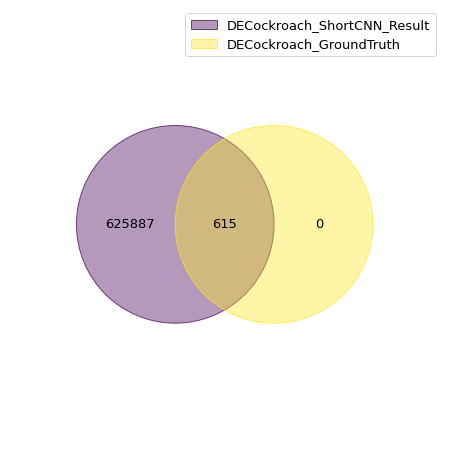

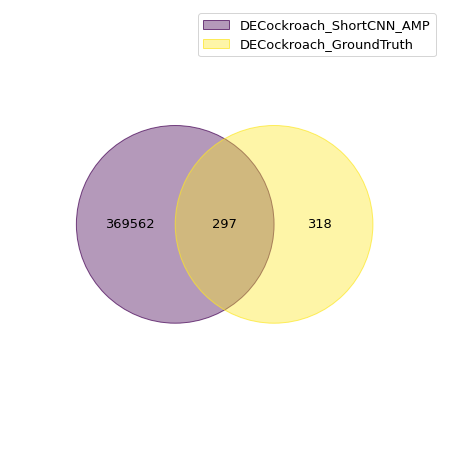

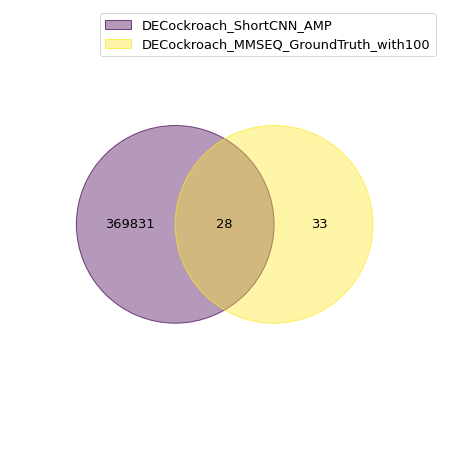

In [109]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_ShortCNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_ShortCNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_ShortCNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_ShortCNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth)

In [110]:
# total 
accuracy_cal(297, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(28, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 48.29
 Accuracy Percentage = 45.90
Total result 626502
Total predicted AMP 369859
Total predicted NonAMP 256643
Total AMP  from MMSEQ: 615
Total AMP with_100 from MMSEQ: 61


In [ ]:
## <= 30

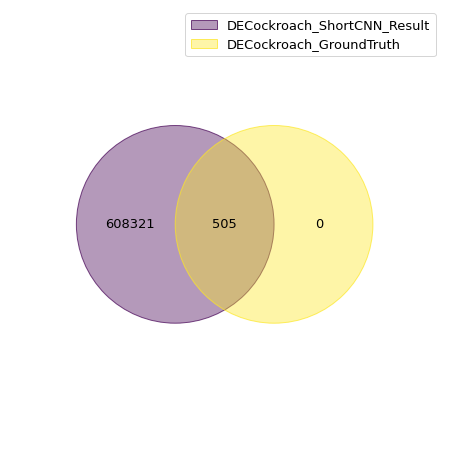

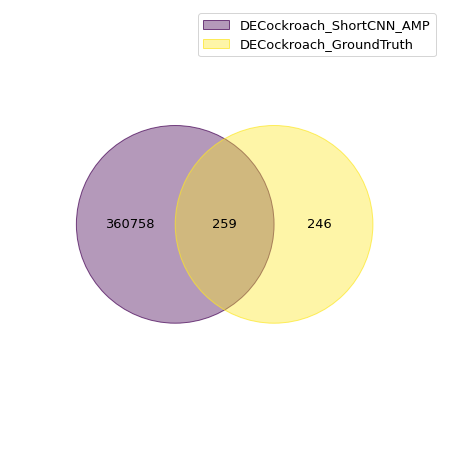

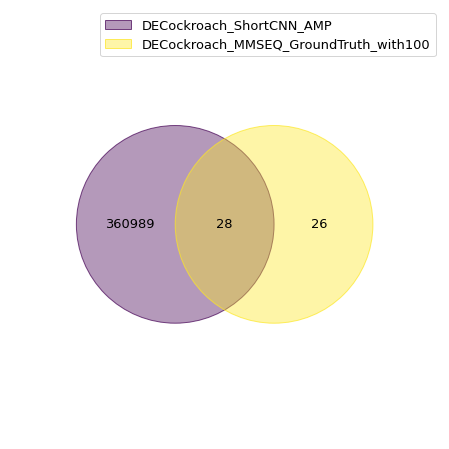

In [107]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_ShortCNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_ShortCNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_ShortCNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_ShortCNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth) 

In [108]:
# total 
accuracy_cal(259, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(28, DECockroach_total_AMPS_with100 )

print("Total result " + str(len(DECockroach_ML)) )
print("Total predicted AMP " + str(len(DECockroach_AMPs_ML)) )
print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )

 Accuracy Percentage = 51.29
 Accuracy Percentage = 51.85
Total result 608826
Total predicted AMP 361017
Total predicted NonAMP 247809
Total AMP  from MMSEQ: 505
Total AMP with_100 from MMSEQ: 54


In [13]:
for key, value in method_dict.items():
    method = value
    print("-----------------"+ method +"-------------------------")
    DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_"+method+"/DECockroach.len15.MLResult.plk")
    DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
    
    DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
    DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
    
    # AMP and Non AMP compare with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_ML,
    #                Bat_len10_truth
    #               )
    # AMP only compares with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_AMPs_ML,
    #                Bat_len10_truth
    #               )
    # AMP only compares with filtering 80% seq identity on ground truth
    filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
    DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
    AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  
    
    # AMP only compares with filtering 100% seq identity on ground truth
    filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
    DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                    Bat_AMPs_ML,
    #                    filtered_BAT_len10_truth
    #               )
    
    
    # AMP match Truthset
    AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
    accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")
    
    AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    # 100%
    accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")
    
    #print("Total result " + str(len(DECockroach_ML)) )
    #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
    #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
    #print("Total match AMP " + str(len(AMP_match_Truth )))
   # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
    #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
   # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )
    
    
    _df_to_report.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
    _df_to_report.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
    _df_to_report.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
    _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
    _df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
    _df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
    _df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
    _df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)
    
    #print("-------------------------------------------------")
    

-----------------Ensemble-------------------------


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/vdb/DECockroach/cd100/result_2_Ensemble/DECockroach.len15.MLResult.plk'

In [136]:
_df_to_report

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,325636,300933,311,48.75,42,54.55,148.0,46.98
FastAI,423085,203484,449,70.38,62,80.52,233.0,73.97
RF,454656,171913,368,57.68,41,53.25,152.0,48.25
XGBoost,413005,213564,417,65.36,57,74.03,219.0,69.52
SVM,330734,295835,370,57.99,63,81.82,195.0,61.90
AmPep30,369870,256699,297,46.55,28,36.36,134.0,42.54
CNN_RMSpop,224368,402201,182,28.53,20,25.97,58.0,18.41
CNN_Adam,343297,283272,335,52.51,49,63.64,158.0,50.16
ProtCNN,300985,325584,307,48.12,42,54.55,152.0,48.25
DNN,465106,161463,437,68.50,31,40.26,201.0,63.81


In [15]:
for key, value in method_dict.items():
    method = value
    print("-----------------"+ method +"-------------------------")
    DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2/result_2_"+method+"/DECockroach.len15.MLResult.plk")
    DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
    DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 200]
    DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
    DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
    
    # AMP and Non AMP compare with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_ML,
    #                Bat_len10_truth
    #               )
    # AMP only compares with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_AMPs_ML,
    #                Bat_len10_truth
    #               )
 
    # AMP only compares with filtering 80% seq identity on ground truth
    filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
    DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
    AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%") 
    
    # AMP only compares with filtering 100% seq identity on ground truth
    filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
    DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                    Bat_AMPs_ML,
    #                    filtered_BAT_len10_truth
    #               )
    
    
    # AMP match Truthset
    AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
    accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS,"no condi")
    
    AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    # 100%
    accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100,"100%")
    
    #print("Total result " + str(len(DECockroach_ML)) )
    #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
    #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
    #print("Total match AMP " + str(len(AMP_match_Truth )))
   # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
    #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
   # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )
    
    
    _df_to_report_200.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
    _df_to_report_200.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
    _df_to_report_200.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
    _df_to_report_200.loc[key, 'Accuracy %']= round(accuracy, 2)
    _df_to_report_200.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
    _df_to_report_200.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
    _df_to_report_200.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
    _df_to_report_200.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)
    
    #print("-------------------------------------------------")

-----------------Ensemble-------------------------
80% Accuracy Percentage = 42.81
no condi Accuracy Percentage = 46.83
100% Accuracy Percentage = 42.62
-----------------FastAI-------------------------
80% Accuracy Percentage = 72.26
no condi Accuracy Percentage = 69.43
100% Accuracy Percentage = 77.05
-----------------RF-------------------------
80% Accuracy Percentage = 44.18
no condi Accuracy Percentage = 56.10
100% Accuracy Percentage = 40.98
-----------------XG-------------------------
80% Accuracy Percentage = 67.12
no condi Accuracy Percentage = 64.07
100% Accuracy Percentage = 67.21
-----------------SVM-------------------------
80% Accuracy Percentage = 58.90
no condi Accuracy Percentage = 56.42
100% Accuracy Percentage = 77.05
-----------------ShortCNN-------------------------
80% Accuracy Percentage = 45.89
no condi Accuracy Percentage = 48.29
100% Accuracy Percentage = 45.90
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 12.33
no condi Accurac

In [17]:
_df_to_report_200

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,325605,300897,288,46.83,26,42.62,125,42.81
FastAI,423053,203449,427,69.43,47,77.05,211,72.26
RF,454623,171879,345,56.10,25,40.98,129,44.18
XGBoost,412967,213535,394,64.07,41,67.21,196,67.12
SVM,330700,295802,347,56.42,47,77.05,172,58.90
AmPep30,369859,256643,297,48.29,28,45.90,134,45.89
CNN_RMSpop,224339,402163,160,26.02,4,6.56,36,12.33
CNN_Adam,343257,283245,312,50.73,33,54.10,135,46.23
ProtCNN,300954,325548,284,46.18,26,42.62,129,44.18
DNN,465094,161408,436,70.89,31,50.82,200,68.49


In [16]:
for key, value in method_dict.items():
    method = value
    print("-----------------"+ method +"-------------------------")
    DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2/result_2_"+method+"/DECockroach.len15.MLResult.plk")
    DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
    DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 30]
    DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
    DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
    
    # AMP and Non AMP compare with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_ML,
    #                Bat_len10_truth
    #               )
    # AMP only compares with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_AMPs_ML,
    #                Bat_len10_truth
    #               )
     # AMP only compares with filtering 80% seq identity on ground truth
    filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
    DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
    AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%") 
    
    # AMP only compares with filtering 100% seq identity on ground truth
    filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
    DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                    Bat_AMPs_ML,
    #                    filtered_BAT_len10_truth
    #               )
    
    
    # AMP match Truthset
    AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
    accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS,"no condi")
    
    AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    # 100%
    accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100,"100%")
    
    #print("Total result " + str(len(DECockroach_ML)) )
    #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
    #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
    #print("Total match AMP " + str(len(AMP_match_Truth )))
   # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
    #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
   # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )
    
    
    _df_to_report_30.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
    _df_to_report_30.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
    _df_to_report_30.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
    _df_to_report_30.loc[key, 'Accuracy %']= round(accuracy, 2)
    _df_to_report_30.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
    _df_to_report_30.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
    _df_to_report_30.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
    _df_to_report_30.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)
    
    #print("-------------------------------------------------")

-----------------Ensemble-------------------------
80% Accuracy Percentage = 41.60
no condi Accuracy Percentage = 47.13
100% Accuracy Percentage = 44.44
-----------------FastAI-------------------------
80% Accuracy Percentage = 72.90
no condi Accuracy Percentage = 72.87
100% Accuracy Percentage = 81.48
-----------------RF-------------------------
80% Accuracy Percentage = 41.60
no condi Accuracy Percentage = 55.25
100% Accuracy Percentage = 38.89
-----------------XG-------------------------
80% Accuracy Percentage = 66.41
no condi Accuracy Percentage = 64.55
100% Accuracy Percentage = 68.52
-----------------SVM-------------------------
80% Accuracy Percentage = 58.02
no condi Accuracy Percentage = 57.03
100% Accuracy Percentage = 79.63
-----------------ShortCNN-------------------------
80% Accuracy Percentage = 47.71
no condi Accuracy Percentage = 51.29
100% Accuracy Percentage = 51.85
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 8.78
no condi Accuracy

In [18]:
_df_to_report_30

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,318932,289894,238,47.13,24.0,44.44,109.0,41.60
FastAI,415539,193287,368,72.87,44.0,81.48,191.0,72.90
RF,445533,163293,279,55.25,21.0,38.89,109.0,41.60
XGBoost,404124,204702,326,64.55,37.0,68.52,174.0,66.41
SVM,324304,284522,288,57.03,43.0,79.63,152.0,58.02
AmPep30,361017,247809,259,51.29,28.0,51.85,125.0,47.71
CNN_RMSpop,218579,390247,110,21.78,3.0,5.56,23.0,8.78
CNN_Adam,335212,273614,249,49.31,29.0,53.70,115.0,43.89
ProtCNN,292751,316075,231,45.74,23.0,42.59,111.0,42.37
DNN,454750,154076,371,73.47,30.0,55.56,182.0,69.47


# Result_3

## FULL

In [9]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_3/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)

        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 92.70
no condi Accuracy Percentage = 87.15
100% Accuracy Percentage = 90.91
-----------------RF-------------------------
-----------------XG-------------------------
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
-----------------CNN_Adam-------------------------
-----------------ProtCNN-------------------------
-----------------DNN-------------------------


In [10]:
_df_to_report

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,543839,82730,556,87.15,70,90.91,292,92.7
RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_Adam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProtCNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <= 200 aa

In [23]:
_df_to_report_200

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,543810,82692,534,86.83,55,90.16,270,92.47
RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_Adam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProtCNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <-= 30 aa

In [20]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_3/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)
        DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 30]
        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )

        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%") 

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS,"no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100,"100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report_30.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report_30.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report_30.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report_30.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report_30.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report_30.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report_30.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report_30.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 84.93
no condi Accuracy Percentage = 75.77
100% Accuracy Percentage = 85.25
-----------------RF-------------------------
-----------------XG-------------------------
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
-----------------CNN_Adam-------------------------
-----------------ProtCNN-------------------------
-----------------DNN-------------------------


In [21]:
_df_to_report_30

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,536065,72761,466,75.77,52.0,85.25,248.0,84.93
RF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_Adam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProtCNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
